In [54]:
# Read gtf file
with open("./Viola.gtf") as f:
    gene_chr = {}
    for line in f:
        if line.startswith('#'):
            continue
        else:
            line = line.strip().split('\t')
            if line[2] == 'transcript':
                gene_chr[line[8].strip()] = line[0].strip()

with open("./Viola.gtf") as f:
    chr_gene = {}
    for line in f:
        if line.startswith("#"):
            continue
        else:
            line = line.strip().split("\t")
            if line[2] == "transcript":
                if line[0] not in chr_gene:
                    chr_gene[line[0]] = []
                chr_gene[line[0]].append(line[8].strip())

# Read synteny file
with open("./Viola.Viola.anchors") as f:
    synteny = {}
    for line in f:
        if line.startswith("#"):
            block = []
            continue
        else:
            line = line.strip().split("\t")
            block.append([line[0], line[1]])
        if gene_chr[block[0][0]] not in synteny:
            synteny[gene_chr[block[0][0]]] = []
        if gene_chr[block[0][1]] not in synteny:
            synteny[gene_chr[block[0][1]]] = []


        synteny[gene_chr[block[0][0]]].append(block)
        synteny[gene_chr[block[0][1]]].append(block)

# Count the number of synteny blocks
for key in synteny:
    print(key, len(synteny[key]), len(chr_gene[key]), sep="\t")

print("total", sum(list(map(len, synteny.values()))), sum(list(map(len, chr_gene.values()))), sep="\t")

HiC_scaffold_9	2569	5522
HiC_scaffold_5	1883	4013
HiC_scaffold_6	2237	4687
HiC_scaffold_4	2122	4617
HiC_scaffold_3	1311	4489
HiC_scaffold_7	2698	5299
HiC_scaffold_1	2247	4848
HiC_scaffold_10	1487	4239
HiC_scaffold_11	1903	4464
HiC_scaffold_8	1907	4427
HiC_scaffold_2	1891	4365
HiC_scaffold_12	1973	4541
total	24228	55511


In [55]:
pool = []
for key, values in synteny.items():
    for i in values:
        for j in i:
            pool.append(j)

In [56]:
target = {}
with open("./self.m8") as f:
    for line in f:
        line = line.strip().split("\t")
        target[(line[0], line[1])] = float(line[-2])
        target[(line[1], line[0])] = float(line[-2])

In [67]:
value = []
cnt = 0
total = 0
for i, j in pool:
    total += 1
    try:
        if target[(i, j)] !=0 :
            cnt += 1
            value.append(np.log10(target[(i, j)]))
    except KeyError:
        continue
print(cnt, total, cnt / total * 100)

586466 1505304 38.959970876314685


<AxesSubplot:ylabel='Count'>

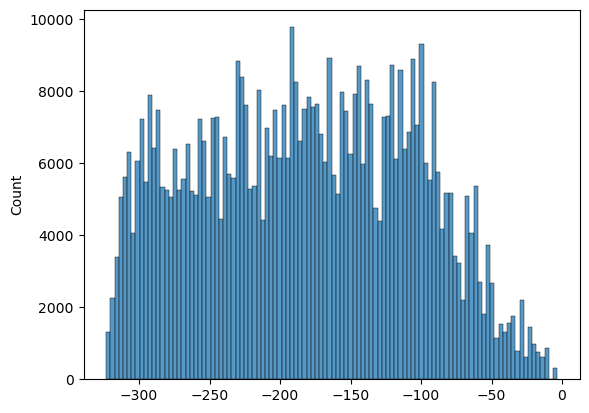

In [68]:
import seaborn as sns
import numpy as np
sns.histplot(value)